Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* You've worked really hard and submitted a solid project.
* Thank you for structuring the project. It's a pleasure to check such notebooks.
* There are a couple of things that need to be done before your project is complete, but they're pretty straightforward.
* There are few things I'd like you to check. They're not mistakes, but your project could be improved if you correct them.
* I believe you can easily fix it! Good luck!

<div class="alert alert-block alert-success">
<b>Thank you. I work really hard on these projects and have a great time doing them. I think I fixed a lot of the mistakes that were there. </b>
</div>

### <font color='orange'>General feedback (review 2)</font>
* New comments are marked with "review 2" keyword.
* Good luck in fixing errors.

### <font color='orange'>General feedback (review 3)</font>
* New comment is marked with "review 3" keyword.

### <font color='orange'>General feedback (review 4)</font>
* All your hard work has paid off, and now your project is perfect!
* Keep up the good work. Good luck next!

### Thank you. If there is anything else I need to fix to continue my improvement of the project and beyond please tell me. Thank you!

# Introduction

#### In this report I am going to be looking at Beta Bank customers information to train a Machine Learning model to predict if customers will leave. Using this model, I hope to provide Beta Bank with better information about the clientele that are staying and others that are leaving. 

#### The Maching Learning Model that we are building needs to have an F1 Score of at least 0.59. I want to optimize the model to make it have a high precision and recall to help the company make decisions based off of the machine learning model.

In [1]:
!pip install fast_ml

     |████████████████████████████████| 42 kB 1.9 MB/s  eta 0:00:01


## Import Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.utils import resample
from sklearn.utils import shuffle
import seaborn as sns
from math import sqrt

from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>

## Load the dataset

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

## View the size of the dataframe

In [4]:
data.shape

(10000, 14)

## View the first 5 rows in the dataframe

### I think surname is not important in this dataset and should be taken out of the features part of the data.

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Checking for the amount of 'NAN' in the dataframe.

In [6]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

## Filling NAN with 0 for tenure because 0 years of tenure will not affect the dataset

In [7]:
data['Tenure'].fillna(0, inplace=True)

In [8]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Checking for duplicates

In [9]:
data.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Success:</b> Data loading and initial analysis were done well! It was possible solution to fill nans.
</div>

## Checking for a data imbalance

### We can see that there is an imabalance in the data that is favoring 0, not exited. I need to upsample the data to make sure there is not a bias towards the 0 category.

0    7963
1    2037
Name: Exited, dtype: int64


<AxesSubplot:xlabel='Exited', ylabel='count'>

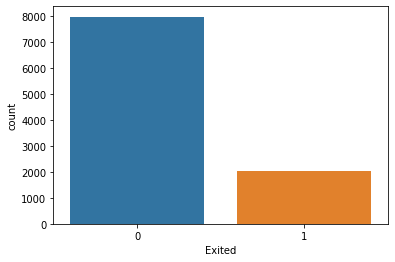

In [10]:
print(data['Exited'].value_counts())
sns.countplot(data['Exited'])

<div class="alert alert-block alert-success">
<b>Success:</b> Great that class balance was visualized.
</div>

## One hot encoded the two columns that are not numerical to work within our model, which were Geography and Gender

In [11]:
data_encoded = pd.get_dummies(data, columns = ['Geography', 'Gender'])
data_encoded.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Created the features dataframe without surname. 

In [12]:
data_encoded = data_encoded.drop(['Surname'], axis=1)

## Formed the target dataframe, which is did the customers exit or not?

In [13]:
target = data_encoded['Exited']

## Created the features dataframe without exited.

In [14]:
features = data_encoded.drop(['Exited'], axis=1)
features.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,1,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,1,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,1,0,0,1,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,1,0


<div class="alert alert-block alert-info">
<b>Improve: </b> You could drop RowNumber and CustomerId too.
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> OHE is the most apropriate way to encode categorical features.
</div>

## Split the set into a training and test set with features and target used.

In [15]:
features_train, target_train, features_valid, target_valid, features_test, target_test = train_valid_test_split(data_encoded, target='Exited',train_size=0.6, valid_size=0.2, test_size=0.2)

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Please don't forget about test set.
</div>

<div class="alert alert-block alert-success">
I created the test set to model the train_test_split I saw in the workshop.
</div>

## Tried the DecisionTree Classifier and immediately dismissed the model because it was lower than random chance.

In [16]:
dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, target_train)

DecisionTreeClassifier()

In [17]:
y_predicted = dt_model.predict(features_test)

In [18]:
f1_score_value = f1_score(target_test, y_predicted)
print(f'F1 Score: {f1_score_value}')

F1 Score: 0.4837451235370611


In [19]:
roc_auc_value = roc_auc_score(target_test, y_predicted)
print(f'roc_auc_score: {roc_auc_value}')

roc_auc_score: 0.6856032589901037


<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> roc auc score should be measured between real values and probabilities of first class.
</div>

<div class="alert alert-block alert-success">
I'm not fully understanding what you mean. I looked at Marcela's workshop and modeled the ROC_AUC_VALUE based off of her model.
</div>

## Naive Bayes (Dismissed because of low F1 score.)

In [20]:
gnb_model = GaussianNB()
gnb_model.fit(features_train, target_train)

GaussianNB()

In [21]:
predicted_valid = gnb_model.predict(features_test)

In [22]:
f1_score_value = f1_score(target_test, y_predicted)
print(f'F1 Score: {f1_score_value}')

F1 Score: 0.4837451235370611


In [23]:
roc_auc_value = roc_auc_score(target_test, y_predicted)
print(f'roc_auc_score: {roc_auc_value}')

roc_auc_score: 0.6856032589901037


## KNN (Dismissed because of low F1 score.)

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred = knn_model.predict(features_test)

In [26]:
f1_score_value = f1_score(target_test, y_pred)
print(f'F1 Score: {f1_score_value}')

F1 Score: 0.18446601941747573


In [27]:
roc_auc_value = roc_auc_score(target_test, y_pred)
print(f'roc_auc_score: {roc_auc_value}')

roc_auc_score: 0.5185014205133043


## Created a Random Forest Classifier Model and trained it using the features and target.

In [28]:
best_score = 0
best_est = 0
for est in range(1, 500, 20): # choose hyperparameter range
    model = RandomForestClassifier(random_state=54321, n_estimators=est) # set number of trees
    model.fit(features_train, target_train) # train model on training set
    y_pred = model.predict(features_valid)
    f1_score_value = f1_score(target_valid, y_pred) # calculate f1_score on validation set
    print(f"Est: {est}, F1_score: {f1_score_value}")
    if f1_score_value > best_score:
        best_score = f1_score_value
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))



Est: 1, F1_score: 0.4444444444444445
Est: 21, F1_score: 0.5418569254185693
Est: 41, F1_score: 0.5409582689335394
Est: 61, F1_score: 0.5527950310559007
Est: 81, F1_score: 0.557632398753894
Est: 101, F1_score: 0.5514018691588785
Est: 121, F1_score: 0.557632398753894
Est: 141, F1_score: 0.5567651632970452
Est: 161, F1_score: 0.5617283950617284
Est: 181, F1_score: 0.5598755832037325
Est: 201, F1_score: 0.562111801242236
Est: 221, F1_score: 0.5652173913043478
Est: 241, F1_score: 0.5598755832037325
Est: 261, F1_score: 0.561622464898596
Est: 281, F1_score: 0.55748031496063
Est: 301, F1_score: 0.5539906103286386
Est: 321, F1_score: 0.554858934169279
Est: 341, F1_score: 0.5571205007824725
Est: 361, F1_score: 0.5602503912363068
Est: 381, F1_score: 0.5593750000000001
Est: 401, F1_score: 0.5585023400936038
Est: 421, F1_score: 0.5642633228840125
Est: 441, F1_score: 0.5607476635514018
Est: 461, F1_score: 0.5602503912363068
Est: 481, F1_score: 0.5607476635514018
Accuracy of the best model on the vali

In [29]:
rfc_model = RandomForestClassifier(random_state=54321, n_estimators=best_est, max_depth = 15) # change n_estimators to get best model
rfc_model.fit(features_valid, target_valid)

RandomForestClassifier(max_depth=15, n_estimators=221, random_state=54321)

In [30]:
y_predict = rfc_model.predict(features_test)

## With optimal estimators and depth the F1 Score came out to 0.51, with n_estimators = 161 and max_depth = 15. Even with these parameter tunings it is not giving us our desired outcome of over 0.59.

In [31]:
f1_score_value = f1_score(target_test, y_predict)
print(f'F1 Score: {f1_score_value}')

F1 Score: 0.5051194539249148


## Calculated the ROC_AUC_Score as 0.72

In [32]:
roc_auc_value = roc_auc_score(target_test, y_predict)
print(f'roc_auc_score: {roc_auc_value}')

roc_auc_score: 0.6788961527833622


## The RMSE came out to 0.368 for the Random Forest Classifier Model.

In [33]:
rmse = sqrt(mean_squared_error(target_test, y_predict))
print(f'RMSE: {rmse}')

RMSE: 0.3807886552931954


<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Please make parameters tuning for at least one model.
</div>

<div class="alert alert-block alert-success">
I tuned the RandomForestClassifier to have n_estimators at 500 and max_depth of 20.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing (review 2):</b> We need to make automating tuning using loops. train and valid sets should be used (train model on train set and select best parameters with the help of score on valid set).
</div>

<div class="alert alert-block alert-danger">

<b>Needs fixing (review 3):</b> In this case `.score` returns accuracy. It would be better if you've used f1 metric instead of accuracy.
</div>

#### I tuned the f1_score to it's optimal value. I used a for loop to iterate over the n_estimators from 1 to 500 with steps of 20 in between to speed up the process and show where our optimal range of f1_scores will be. 

## Creating a function to upsample the data to fix the imbalance between the two target classes.

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)


<div class="alert alert-block alert-success">
<b>Success:</b> Great that resampling was applied only to trai set.
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> Do classes became balanced with repeat=10?
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Please try at least one more method of categorical features encoding.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing (review 2):</b> Sorry it was a typo. Please use one more method of class imbalance fixing.
</div>

## Used the RandomForest Classifier model with the original highest F1 Score. 

### Seeing how the Random Forest Classifier F1 Score will improve based on the upsampling done above.

In [57]:
model = RandomForestClassifier(n_estimators = best_est, max_depth = 15, random_state=12345)
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(max_depth=15, n_estimators=221, random_state=12345)

In [58]:
predicted_y = model.predict(features_test)

## The F1 Score is at 0.60, which is above the 0.59 threshold that we are hoping for. 

In [59]:
f1_value = f1_score(target_test, predicted_y)
print(f'F1 Score: {f1_value}')

F1 Score: 0.5909090909090909


## The Accuracy Score is at 0.85.

In [38]:
acc_score = accuracy_score(target_test, predicted_y)
print(f'Accuracy Score: {acc_score}')

Accuracy Score: 0.8515


## The ROC_AUC score is at 0.73, which is also significantly higher.

In [39]:
rocauc_score = roc_auc_score(target_test, predicted_y)
print(f'roc_auc_score: {rocauc_score}')

roc_auc_score: 0.7277454294550094


## Creating a confusion matrix to see the results of the data.

In [40]:
conf_matrix = metrics.confusion_matrix(target_test, predicted_valid)

## The Accuracy Score comes out to 84% and our model has an issue with predicting 1's in our model with 0's. 504 incorrect out of around 2500 is something that could be improved upon.

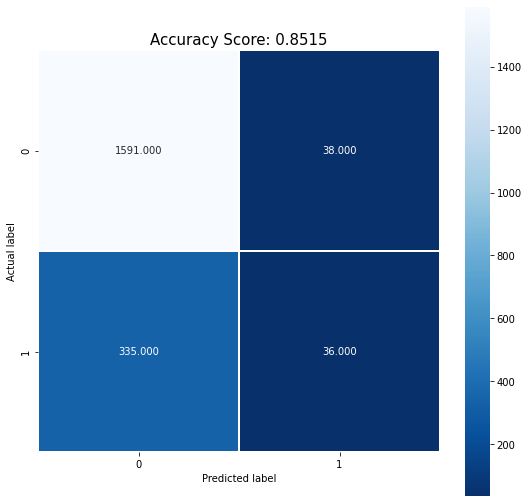

In [41]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15);

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Don't forget about final testing.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Test set should be used only here for testing.
</div>

#### I think I did all of the final testing with the confusion matrix and the scores. Is there anything else I can test to improve the project?

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> RMSE should not be measured in classification problem.
</div>

#### Thank you. I agree and I am not sure why I added this to the project.

<div class="alert alert-block alert-success">
<b>Success (reivew 2):</b> OK.
</div>

# Conclusions

## The Random Forest Classifier with parameters set at n_est = 161 and max_depth = 15 support the Machine Learning Model's F1 Score to be 0.51. But to truly put the F1 Score over our intended goal, which is 0.59, we need to upsample the data.

### After upsampling the data our Random Forest Classifier with the same parameters comes out to 0.60, which is above the 0.59 threshold and I feel confident that the company can get useful and productive information out of the model to make better predictions for the future.